In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.sans-serif"] = "Arial"

In [4]:

df = pd.read_csv('Stage-Discharge Sagehorn - Sagehorn stage-discharge.csv')
#ignore hank, other tribs
dry =df[df.Creek=='DRY'] 
#ignore salt discharge
dryData = dry[(dry['Method']=='Wading rod')|
                   (dry['Method']=='Guestimate from channel cross-section, leaf velocity') |
                    (dry['Method']=='stopwatch and bucket volume') ]
dryLow=dryData[dryData['Water level height [m]']<0.8]
dryHigh=dryData[dryData['Water level height [m]']>0.9]


In [5]:
# pLow = np.polyfit(dryWadingRodLow['Water level height [m]'].values, dryWadingRodLow['Discharge [m^3/s]'].values,deg=2)
pLow = np.polyfit(np.log(dryLow['Water level height [m]'].values), 
                  np.log(dryLow['Discharge [m^3/s]'].values)
                  ,deg=2)

pLow

array([-5.07713153,  0.4484192 ,  1.47924463])

In [6]:
x1 = 0.8
# y1 = pLow[0]*x1**2 + pLow[1]*x1 + pLow[2]
y1= np.exp(pLow[0]*np.log(x1)**2 + pLow[1]*np.log(x1) + pLow[2])
x2 = (dryHigh['Water level height [m]']).mean()
y2 = (dryHigh['Discharge [m^3/s]']).mean()


In [8]:
pHigh = np.polyfit(np.log(np.append(dryWadingRodHigh['Water level height [m]'].values,x1)), 
                   np.log(np.append(dryWadingRodHigh['Discharge [m^3/s]'].values,y1)),
                   deg=2,
                   w=[1,1,1000])
pHigh

array([-0.29377786,  2.56692557,  1.71379793])

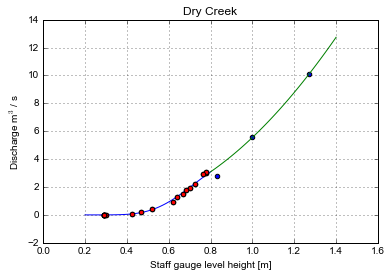

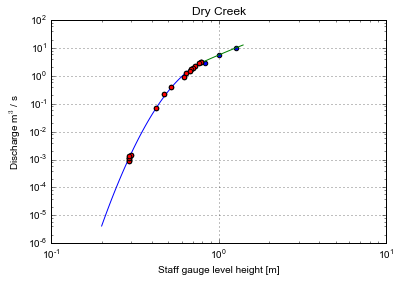

In [9]:
xsLow = np.linspace(0.20,0.8,100)
xsHigh = np.linspace(0.8,1.4,100)

ysLow = np.exp(pLow[0]*np.log(xsLow)**2 + pLow[1]*np.log(xsLow) + pLow[2])
ysHigh = np.exp(pHigh[0]*np.log(xsHigh)**2 + pHigh[1]*np.log(xsHigh) + pHigh[2])

plt.scatter(dryData['Water level height [m]'], dryData['Discharge [m^3/s]'],zorder=1 )
plt.scatter(dryLow['Water level height [m]'], dryLow['Discharge [m^3/s]'],c='red',zorder=100 )
plt.plot(xsLow,ysLow)
plt.plot(xsHigh,ysHigh)

plt.grid()
plt.ylabel('Discharge m$^3$ / s')
plt.xlabel('Staff gauge level height [m]')
plt.title('Dry Creek')

plt.show()

plt.scatter(dryData['Water level height [m]'], dryData['Discharge [m^3/s]'],zorder=1 )
plt.scatter(dryLow['Water level height [m]'], dryLow['Discharge [m^3/s]'],c='red',zorder=100 )
plt.plot(xsLow,ysLow)
plt.plot(xsHigh,ysHigh)

plt.grid()
plt.ylabel('Discharge m$^3$ / s')
plt.xlabel('Staff gauge level height [m]')
plt.title('Dry Creek')
plt.yscale('log')
plt.xscale('log')
plt.savefig('Data/Output/Dry-Stage-Discharge.pdf')


In [ ]:
# the point 0.83, 2.79 is considered an outlier. consistent with notes from that day that state:
#"many SNR, velocity angle, and %Q > 5% warnings"
